<a href="https://colab.research.google.com/github/JuanPabloJP/Data-visualization/blob/main/5%20PCA/pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualization: PCA

**Hernández Lozano Juan Pablo**

Con los datos contenidos en “`iris.csv`”:

- Haga gráficos de dispersión 2D entre las variables (p.e., Petal.Length vs. Petal.Width). El objetivo es explorar posibles correlaciones entre variables. Comente sus resultados. 
En caso de hacer varios gráficos de dispersión en una misma figura, use diferentes colores.

In [1]:
import pandas as pd    
import numpy as np 
import matplotlib.pyplot as plt   
import seaborn as sns  

In [2]:
#leemos el archivo
iris = pd.read_csv("iris.csv")
#desplegamos una visualización del dataframe
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Se despliega la dispersión de todas las características separadas por especie de iris:

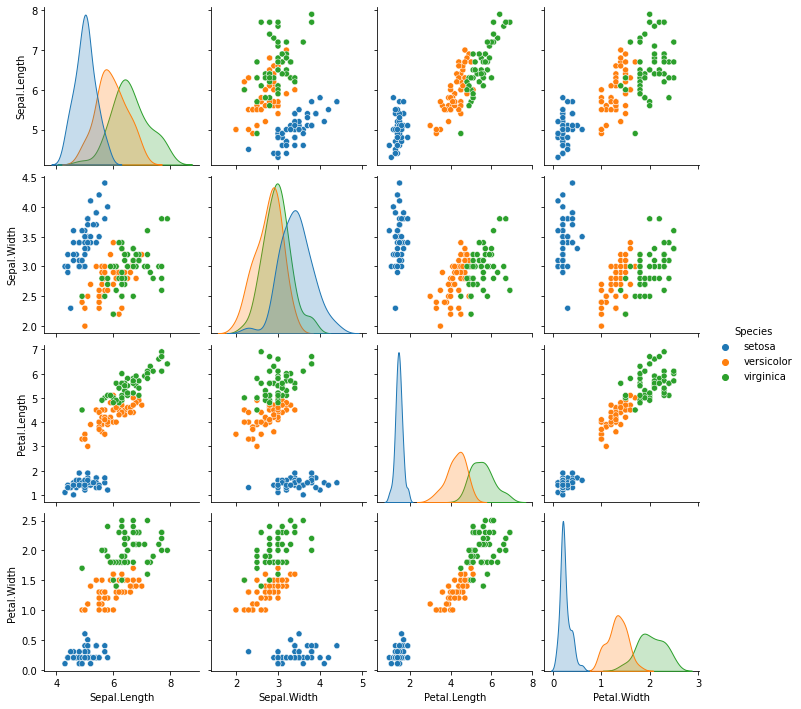

In [3]:
sns.pairplot(iris, hue="Species") 

- Construya un gráfico de dispersión 3D con las variables menos correlacionadas.

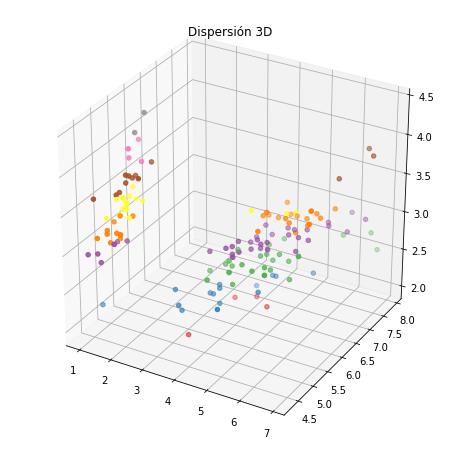

In [4]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm 

x = iris['Petal.Length']
y = iris['Sepal.Length']
z = iris['Sepal.Width']

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter3D(x,y,z, c=z , cmap = 'Set1')
plt.title('Dispersión 3D')
plt.show()

- Construya un histograma para cada característica (Petal.Length,
Petal.Width, Sepal.Length, Sepal.Width) en donde ponga un color
diferente para cada especie.

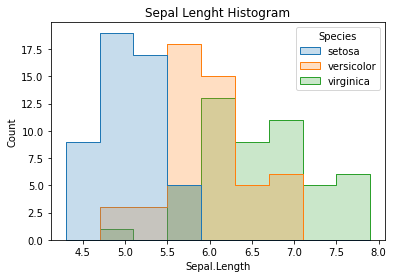

In [5]:
sns.histplot(data=iris, x = 'Sepal.Length', hue= 'Species', element="step")
plt.title('Sepal Lenght Histogram')
plt.show()

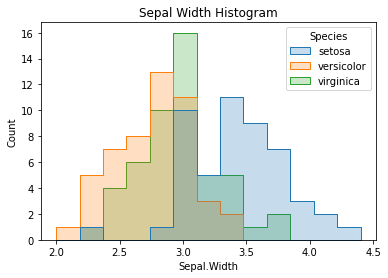

In [6]:
sns.histplot(data=iris, x = 'Sepal.Width', hue= 'Species', element="step")
plt.title('Sepal Width Histogram')
plt.show()

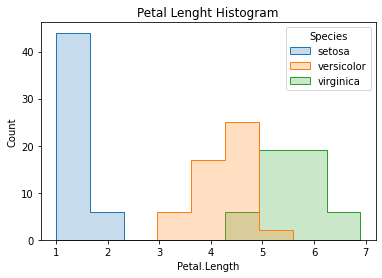

In [7]:
sns.histplot(data=iris, x = 'Petal.Length', hue= 'Species', element="step")
plt.title('Petal Lenght Histogram')
plt.show()

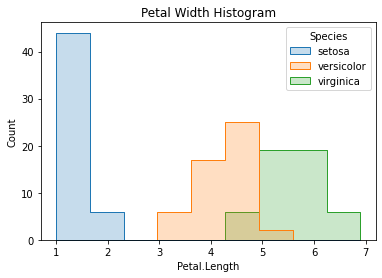

In [8]:
sns.histplot(data=iris, x = 'Petal.Length', hue= 'Species', element="step")
plt.title('Petal Width Histogram')
plt.show()

- Haga el procesamiento necesario a cada columna
(variable/característica) para que la distribución de datos tenga
media cero y varianza unitaria $$ z_i = (x_i - \bar{x})/s $$ donde donde $\bar{x}$ es el valor promedio y $s$ es la desviación típica (esto aplica
para cada columna/variable del dataset).

Primero obtenemos los promedios y desviaciones correspondientes a cada característica: 

In [9]:
#Promedios
mean_sepal_L = iris['Sepal.Length'].mean()
mean_sepal_W = iris['Sepal.Width'].mean()
mean_petal_L = iris['Petal.Length'].mean()
mean_petal_W = iris['Petal.Width'].mean()

#Desviación Estandard

s_sepal_L = iris['Sepal.Length'].std()
s_sepal_W = iris['Sepal.Width'].std()
s_petal_L = iris['Petal.Length'].std()
s_petal_W = iris['Petal.Width'].std()

Aplicamos la transformación para obtener la distirbución normal: 

In [10]:
iris['Sepal.Length'] = (iris['Sepal.Length'] - mean_sepal_L)/s_sepal_L
iris['Sepal.Width'] = (iris['Sepal.Width'] - mean_sepal_W)/s_sepal_W
iris['Petal.Length'] = (iris['Petal.Length'] - mean_petal_L)/s_petal_L
iris['Petal.Width'] = (iris['Petal.Width'] - mean_petal_W)/s_petal_W

Obseramos los nuevos datos:

In [11]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,-0.897674,1.015602,-1.335752,-1.311052,setosa
1,-1.139200,-0.131539,-1.335752,-1.311052,setosa
2,-1.380727,0.327318,-1.392399,-1.311052,setosa
3,-1.501490,0.097889,-1.279104,-1.311052,setosa
4,-1.018437,1.245030,-1.335752,-1.311052,setosa


Tomamos una columna y observamos su nueva distribución:

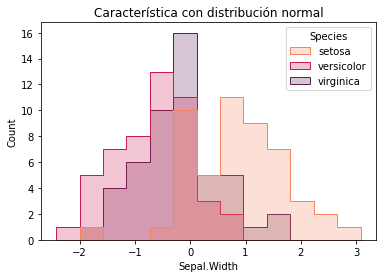

In [12]:
sns.histplot(data=iris, x = 'Sepal.Width', hue= 'Species', element="step" , palette = 'rocket_r')
plt.title('Característica con distribución normal')
plt.show()
#iris['Sepal.Width'].hist()

- Construya la matriz de covarianzas $$ \sum = \frac{1}{n-1} \left( \left(x_i -\bar{x}\right)^T \left(x_i -\bar{x}\right)    \right) $$ donde el vector promedio (vector de promedios) $$ \bar{x} = \frac{1}{n}\sum_{i=1}^n x \epsilon \mathcal{R}^m$$ Recordando que $m$ es el número de variables (en este punto, el
vector de promedios debería ser “cercano” al vector m-dimensional
nulo)

El algoritmo desde cero para la matriz de covarianzas es el siguiente:

In [13]:
N = len(iris)
X = np.column_stack([iris['Sepal.Length'],iris['Sepal.Width'], iris['Petal.Length'],iris['Petal.Width']])
X -= X.mean(axis=0) 
fact = N - 1 
by_hand = np.dot(X.T, X.conj()) / fact
print(by_hand)

[[ 1.         -0.11756978  0.87175378  0.81794113]
 [-0.11756978  1.         -0.4284401  -0.36612593]
 [ 0.87175378 -0.4284401   1.          0.96286543]
 [ 0.81794113 -0.36612593  0.96286543  1.        ]]


Pandas también tiene implementado el método para hacer la matriz de covarianzas de las columnas numérica de un DataFrame:

In [14]:
covMatrix = pd.DataFrame.cov(iris)
print (covMatrix)

              Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
Sepal.Length      1.000000    -0.117570      0.871754     0.817941
Sepal.Width      -0.117570     1.000000     -0.428440    -0.366126
Petal.Length      0.871754    -0.428440      1.000000     0.962865
Petal.Width       0.817941    -0.366126      0.962865     1.000000


La dimensión de la matriz $ \sum $ es $m× m$ (en este caso m = 4).
Verifique el resultado de sus operaciones usando el método `cov` de
`numpy` (el método `cov()` SOLO como verificación)

In [15]:
co = np.array([iris['Sepal.Length'],iris['Sepal.Width'], iris['Petal.Length'],iris['Petal.Width']])
cov_Mat = np.cov(co)
cov_Mat 

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

Observamos que se tienen resultados similares de las tres formas. De la forma algoritmica y con el método de numpy obtenemos los mismos resultados en forma de arreglo. El método de Pandas tiene una presición menor pero tiene la ventaja de que nos devuelve la matriz de covarianzas en formato de DataFrame.

- Calcule los eigenvectores y eigenvalores de la matriz de covarianza
calculada. Una opción es el método `eig()` de `numpy.linalg`.
Imprima en pantalla e inlcuya en su reporte los eigenvalores.

In [16]:
from numpy import linalg as LA
val, vec = LA.eig(cov_Mat)
print('Eigenvalores :', val)
print('Eigenvectores:')
print(vec)

Eigenvalores : [2.91849782 0.91403047 0.14675688 0.02071484]
Eigenvectores:
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


Notamos que los eigenvectores están expresados por columnas

In [17]:
vec = vec.T
vec

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [-0.37741762, -0.92329566, -0.02449161, -0.06694199],
       [-0.71956635,  0.24438178,  0.14212637,  0.63427274],
       [ 0.26128628, -0.12350962, -0.80144925,  0.52359713]])

- ¿Cómo podría verificar que los eigenvectores obtenidos son una
base ortonormal de $\mathcal{R}^4$?

Si los autovectores obtenidos conforman una base ortonormal entonces son linealmente independientes entre ellos y por tanto el producto punto entre estos será cero o dados los cálculos computacionales los valores obtenidos pueden no ser totalmente exactos el producto punto puede ser muy cercano a cero.

In [18]:
print('Producto punto del autovector 1 y el autovector 2 : ', np.dot(vec[0], vec[1]))
print('Producto punto del autovector 1 y el autovector 3 : ', np.dot(vec[0], vec[2]))
print('Producto punto del autovector 1 y el autovector 4 : ', np.dot(vec[0], vec[3]))
print('Producto punto del autovector 2 y el autovector 3 : ', np.dot(vec[1], vec[2]))
print('Producto punto del autovector 2 y el autovector 4 : ', np.dot(vec[1], vec[3]))
print('Producto punto del autovector 3 y el autovector 4 : ', np.dot(vec[2], vec[3]))

Producto punto del autovector 1 y el autovector 2 :  7.494005416219807e-16
Producto punto del autovector 1 y el autovector 3 :  6.106226635438361e-16
Producto punto del autovector 1 y el autovector 4 :  -2.220446049250313e-16
Producto punto del autovector 2 y el autovector 3 :  0.0
Producto punto del autovector 2 y el autovector 4 :  1.3877787807814457e-16
Producto punto del autovector 3 y el autovector 4 :  -9.43689570931383e-16


- Organice de forma descendente los eigenvalores (y sus
correspondientes eigenvectores).

In [19]:
eigval_d = { val[i] : i for i in range(len(val)) }
eigvec_d = { i : vec[i] for i in range(len(vec)) }

In [20]:
val.sort()
val = reversed(val)
eigenvec = [eigvec_d[eigval_d [i]] for i in val]
eigenvec

[array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654]),
 array([-0.37741762, -0.92329566, -0.02449161, -0.06694199]),
 array([-0.71956635,  0.24438178,  0.14212637,  0.63427274]),
 array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713])]

- Consulte cómo se relacionan los eigenvalores con el “`porcentaje de variabilidad explicada`” por cada componente principal.

El método PCA mide que tanto se relacionan las variables entre sí a través de la matriz de covarianzas. Es así que podemos ententer las direcciones en las que se proyectan nuestros datos usando los eigenvetores de dicha matriz y clasificar su importancia en nuestro análisis mediate la magnitud de sus eigenvalores. Entre mayor sea la magnitud del eigenvalor entonces esta componente es más relevante. 

- Construya la matriz $W \epsilon \mathcal{R} ^{4×2}$
con los dos eigenvectores que
corresponden a los mayores eigenvalores. ¿Por qué se usan en este
caso solo 2 componentes principales?

El método PCA sugiere ignorar los eigenvectores de las matiz de covarianza cuyos eigenvalores sean muy cercanos a cero. En este caso tiene sentido que el análisis de los iris se redusaca de dos características para el sépalo y dos para el pétalo a solo dos características: una para el pétalo y otra para el sépalo. Es así que tenemos la siguiente matriz: 

In [21]:
e = eigenvec.copy()
W = np.matrix([e[0],e[1]]).T
W

matrix([[ 0.52106591, -0.37741762],
        [-0.26934744, -0.92329566],
        [ 0.5804131 , -0.02449161],
        [ 0.56485654, -0.06694199]])

- Proyecte los datos al nuevo espacio
$$ Y_{150×2} = X_{150×4} W_{4×2} $$

In [22]:
X = iris.iloc[:,0:4].to_numpy()
Y = np.matmul(X,W)
print('Y con forma', Y.shape ,': \n',Y[0:10])

Y con forma (150, 2) : 
 [[-2.25714118 -0.47842383]
 [-2.07401302  0.67188269]
 [-2.35633511  0.34076642]
 [-2.29170679  0.59539986]
 [-2.3818627  -0.64467566]
 [-2.06870061 -1.4842053 ]
 [-2.43586845 -0.04748512]
 [-2.22539189 -0.222403  ]
 [-2.32684533  1.1116037 ]
 [-2.17703491  0.46744757]]


- Haga un gráfico de dispersión (gráfico 2D) para el conjunto de
datos proyectado (use un color diferente para cada especie: *setosa*,
*virginica* y *versicolor* ). ¿Qué puede observar de este nuevo
conjunto de datos?

In [23]:
Y_df = pd.DataFrame(Y, columns = ['Feature 1','Feature 2'])
pca = pd.concat([Y_df, iris['Species']], axis=1)
pca

,Feature 1,Feature 2,Species
0,-2.257141,-0.478424,setosa
1,-2.074013,0.671883,setosa
2,-2.356335,0.340766,setosa
3,-2.291707,0.595400,setosa
4,-2.381863,-0.644676,setosa
...,...,...,...
145,1.864258,-0.385674,virginica
146,1.559356,0.893693,virginica
147,1.516091,-0.268171,virginica
148,1.368204,-1.007878,virginica


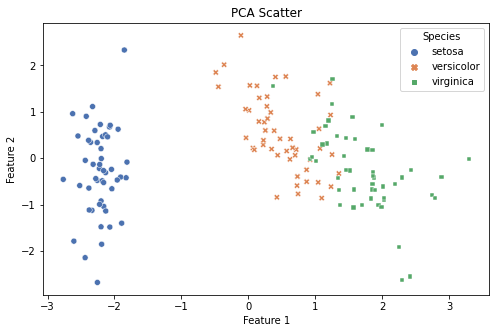

In [24]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=pca, x="Feature 1", y="Feature 2", hue="Species", style = "Species", palette="deep")
plt.title('PCA Scatter')
plt.show()

Observamos que con la reducción de la dimensionalidad por componentes princiales hemos obtenido dos componentes mediante las cuales podemos observar una buena separación y clasificación de las flores iris. 